In [ ]:
from google.colab import files
import zipfile
import os

# Upload zip file
uploaded = files.upload()  # This will open file picker

# Unzip the uploaded file
for fn in uploaded.keys():
    if fn.endswith('.zip'):
        with zipfile.ZipFile(fn, 'r') as zip_ref:
            zip_ref.extractall("skin_data")  # Extract to folder
            print("Extracted to /content/skin_data")

Saving skin_dataset.zip to skin_dataset.zip
Extracted to /content/skin_data


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import os

In [ ]:
# Set dataset path
data_dir = r"/content/skin_data/skin_dataset"

In [ ]:
# 3. Image Parameters
img_size = (128, 128)
batch_size = 32
num_classes = 7

In [ ]:
# 4. Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.1
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 3689 images belonging to 7 classes.
Found 920 images belonging to 7 classes.


In [ ]:
# 5. CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(*img_size, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 6. Train the model
history = model.fit(
    train_data,
    epochs=15,
    validation_data=val_data
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
116/116 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.4047 - loss: 3.7453 - val_accuracy: 0.2870 - val_loss: 6.2242
Epoch 2/15
116/116 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.5164 - loss: 1.3488 - val_accuracy: 0.1522 - val_loss: 3.0573
Epoch 3/15
116/116 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.5688 - loss: 1.1648 - val_accuracy: 0.2011 - val_loss: 3.2894
Epoch 4/15
116/116 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.5700 - loss: 1.1076 - val_accuracy: 0.3674 - val_loss: 2.4241
Epoch 5/15
116/116 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.5972 - loss: 1.0456 - val_accuracy: 0.2848 - val_loss: 2.5606
Epoch 6/15
116/116 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.6354 - loss: 0.9397 - val_accuracy: 0.4228 - val_loss: 1.6280
Epoch 7/15
116/116 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.6392 - loss: 0.9199 - val_accuracy: 0.5880 - val_loss: 1.1708
Epoch 8/15
116/116 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.6470 - loss: 0.8898 - val_accu

In [ ]:
# Training Accuracy (Last Epoch)
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f"\n📈 Final Training Accuracy: {train_acc * 100:.2f}%")
print(f"📊 Final Validation Accuracy: {val_acc * 100:.2f}%")


📈 Final Training Accuracy: 72.35%
📊 Final Validation Accuracy: 58.37%


In [ ]:
# 8. Save the model
model.save("skin_disease_cnn_model.h5")
print("✅ Model saved as skin_disease_cnn_model.h5")

✅ Model saved as skin_disease_cnn_model.h5


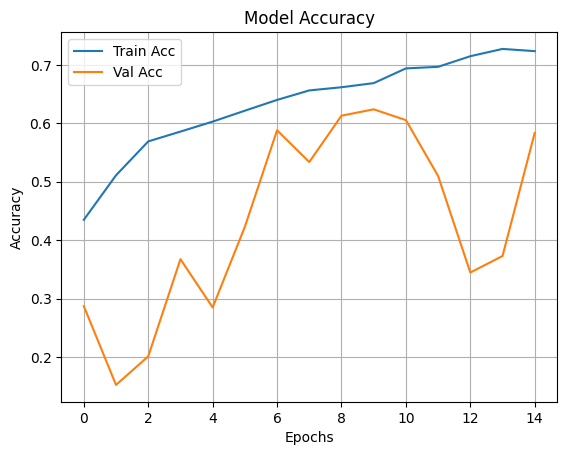

Class Index Mapping:
{'acne': 0, 'alopecia_areata': 1, 'melasma': 2, 'pigment': 3, 'vitiligo': 4, 'warts': 5, 'wrinkle': 6}


In [ ]:
# 9. Plot training history
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# 10. Class Index Mapping
print("Class Index Mapping:")
print(train_data.class_indices)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,918,423 (37.84 MB)

 Trainable params: 3,305,991 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 6,611,984 (25.22 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


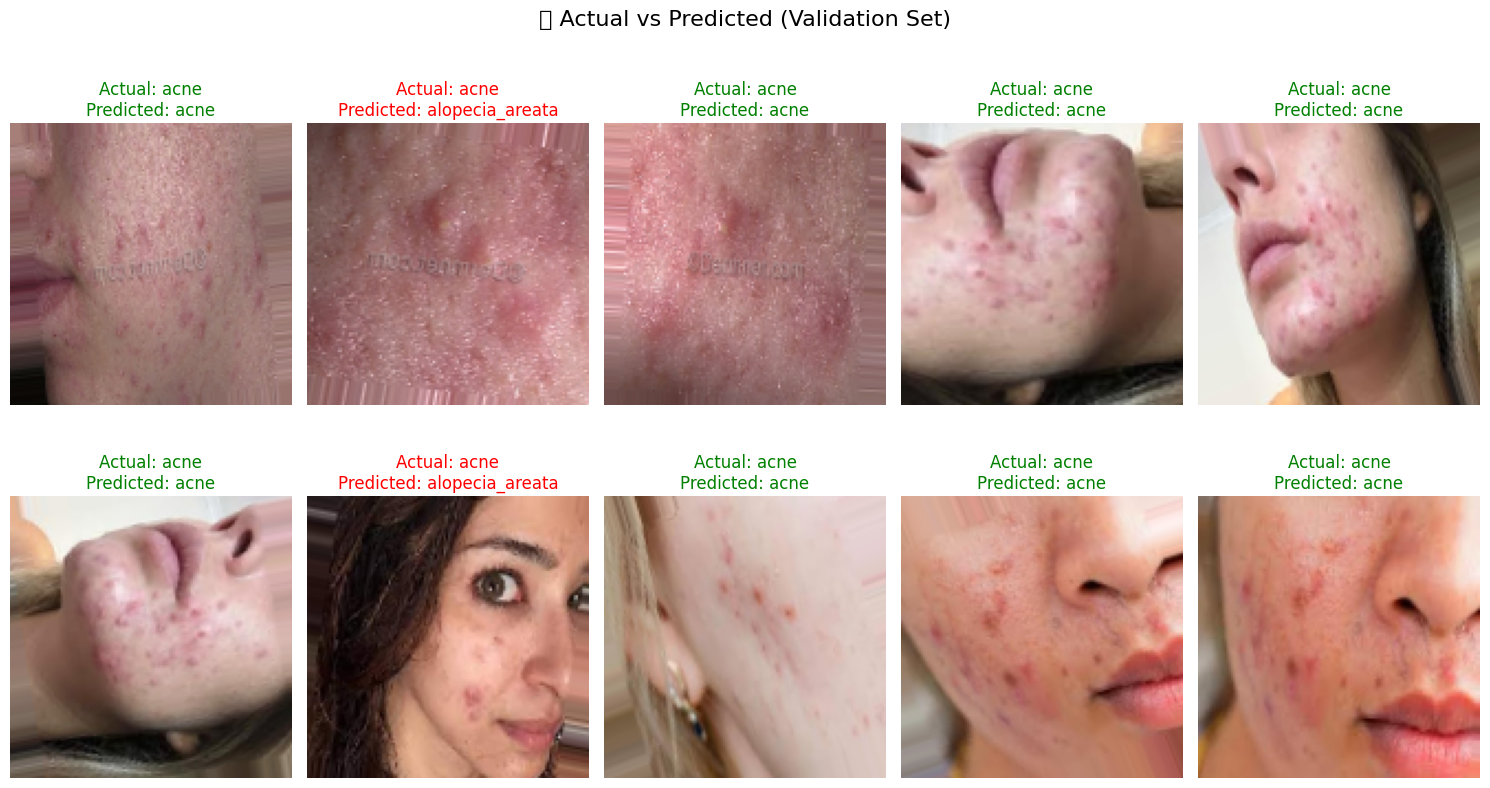

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Reset validation generator to get first batch
val_data.reset()

# Get one batch of validation images
x_val, y_val = next(val_data)

# Predict
preds = model.predict(x_val)
predicted_labels = np.argmax(preds, axis=1)
true_labels = np.argmax(y_val, axis=1)

# Get label mapping
label_map = {v: k for k, v in val_data.class_indices.items()}

# Plotting
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_val[i])
    plt.axis('off')
    true_label = label_map[true_labels[i]]
    pred_label = label_map[predicted_labels[i]]
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"Actual: {true_label}\nPredicted: {pred_label}", color=color)

plt.tight_layout()
plt.suptitle("✅ Actual vs Predicted (Validation Set)", fontsize=16, y=1.05)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


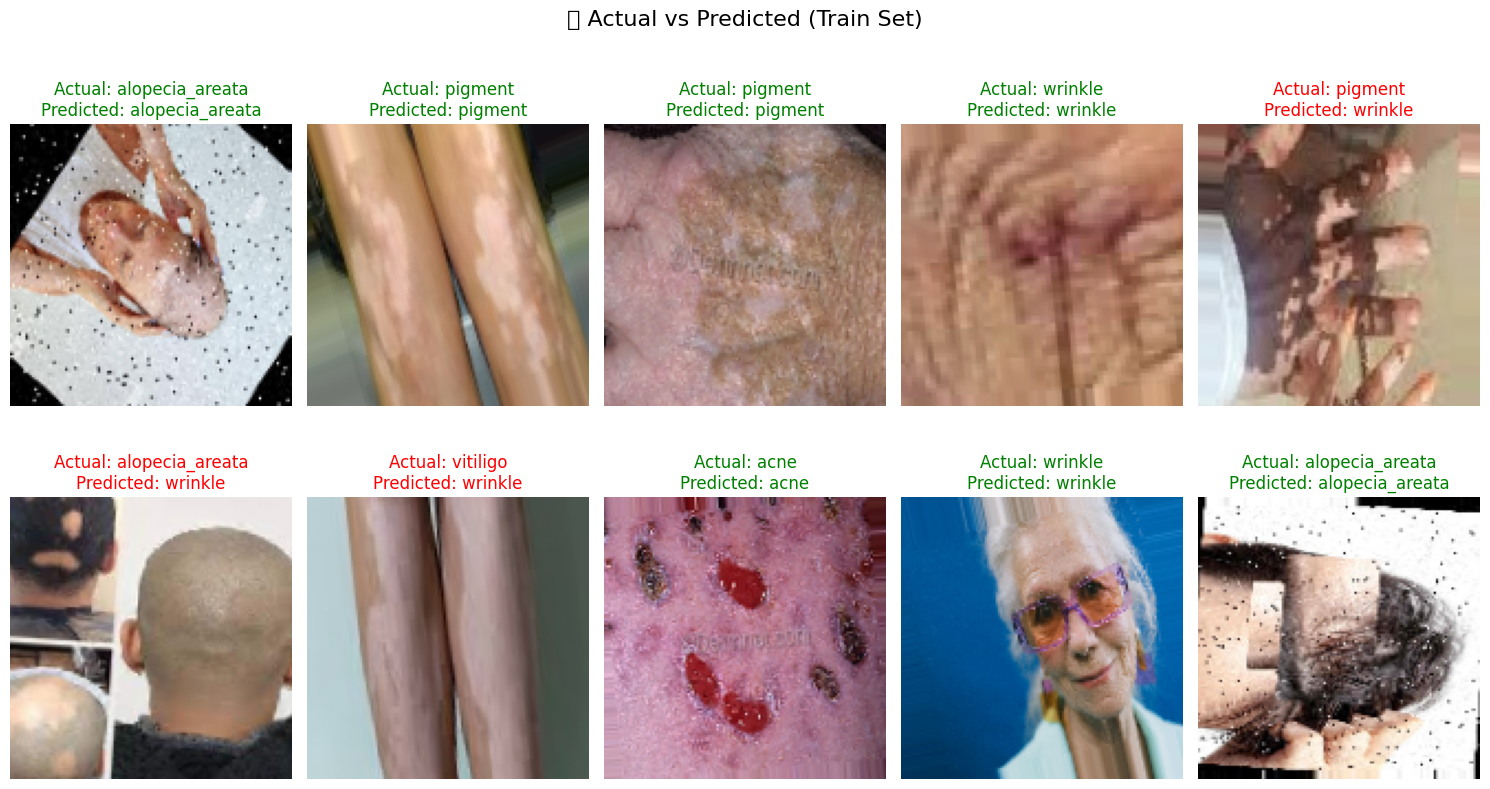

In [ ]:
# Reset train generator to get fresh batch
train_data.reset()

# Get a batch of training images and labels
x_train_batch, y_train_batch = next(train_data)

# Predict on the batch
train_preds = model.predict(x_train_batch)
predicted_train_labels = np.argmax(train_preds, axis=1)
true_train_labels = np.argmax(y_train_batch, axis=1)

# Get label mapping
label_map = {v: k for k, v in train_data.class_indices.items()}

# Plot Actual vs Predicted for Training Set
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
for i in range(10):  # Display 10 images
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train_batch[i])
    plt.axis('off')
    true_label = label_map[true_train_labels[i]]
    pred_label = label_map[predicted_train_labels[i]]
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"Actual: {true_label}\nPredicted: {pred_label}", color=color)

plt.tight_layout()
plt.suptitle("🎯 Actual vs Predicted (Train Set)", fontsize=16, y=1.05)
plt.show()


Example

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

def predict_single_image(model, image_path, class_names):
    """
    Predicts the class of a single image using the trained CNN model.

    Args:
        model: The trained Keras model.
        image_path: Path to the input image.
        class_names: List of class names (e.g., ['cat', 'dog', 'horse']).

    Returns:
        predicted_class (str): Name of the predicted class.
        confidence (float): Prediction confidence score.
    """
    try:
        # Load and preprocess image
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError(f"Image not found or unreadable at: {image_path}")

        img = cv2.resize(img, (128, 128))            # Resize to match model input
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # Convert BGR to RGB
        img = img.astype("float32") / 255.0          # Normalize to [0, 1]
        img = np.expand_dims(img, axis=0)            # Add batch dimension: (1, 128, 128, 3)

        # Prediction
        predictions = model.predict(img)
        predicted_index = np.argmax(predictions[0])
        predicted_class = class_names[predicted_index]
        confidence = float(np.max(predictions[0]))

        return predicted_class, confidence

    except Exception as e:
        print(f"❌ Error during prediction: {e}")
        return None, None


In [ ]:
# Load your trained model
model = load_model('/content/skin_disease_cnn_model.h5')

# Define your class labels in correct order
class_names = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7']

# Predict
image_path = '/content/skin_dataset_test/Vitiligo 4.jpg'
predicted_class, confidence = predict_single_image(model, image_path, class_names)

if predicted_class:
    print(f"✅ Predicted Class: {predicted_class} (Confidence: {confidence:.2f})")
else:
    print("⚠️ Prediction failed.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
✅ Predicted Class: class5 (Confidence: 0.48)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Define label mapping
label_map = {
    0: 'acne',
    1: 'alopecia_areata',
    2: 'melasma',
    3: 'pigment',
    4: 'vitiligo',
    5: 'warts',
    6: 'wrinkle'
}

def predict_and_show_image(model, image_path):
    """
    Predicts the class of an image, shows the image, and prints the label + class.

    Args:
        model: Trained Keras model.
        image_path: Path to input image.
    """
    try:
        # Load and preprocess image
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError(f"Image not found at: {image_path}")

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for plotting
        img_resized = cv2.resize(img_rgb, (128, 128))   # Resize to model input size
        img_normalized = img_resized.astype('float32') / 255.0
        img_input = np.expand_dims(img_normalized, axis=0)  # Add batch dimension

        # Predict
        prediction = model.predict(img_input)
        predicted_label = int(np.argmax(prediction))
        predicted_class = label_map[predicted_label]
        confidence = float(np.max(prediction))

        # Display image and prediction
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title(f"Prediction: {predicted_class} (Label: {predicted_label}, Confidence: {confidence:.2f})")
        plt.show()

    except Exception as e:
        print(f"❌ Error during prediction or display: {e}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


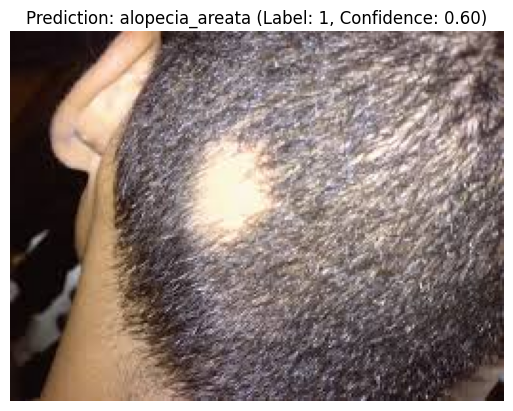

In [ ]:
model = load_model('/content/skin_disease_cnn_model.h5')
image_path = '/content/skin_dataset_test/Alopecia_Areata3.jpg'
predict_and_show_image(model, image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


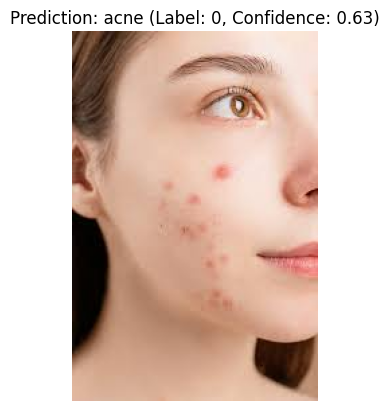

In [ ]:
image_path = '/content/skin_dataset_test/acne.jpg'
predict_and_show_image(model, image_path)